In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import json
from matplotlib import pyplot as plt
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-new/GBvideos.csv
/kaggle/input/youtube-new/MXvideos.csv
/kaggle/input/youtube-new/KRvideos.csv
/kaggle/input/youtube-new/MX_category_id.json
/kaggle/input/youtube-new/GB_category_id.json
/kaggle/input/youtube-new/US_category_id.json
/kaggle/input/youtube-new/IN_category_id.json
/kaggle/input/youtube-new/DEvideos.csv
/kaggle/input/youtube-new/KR_category_id.json
/kaggle/input/youtube-new/RU_category_id.json
/kaggle/input/youtube-new/FRvideos.csv
/kaggle/input/youtube-new/USvideos.csv
/kaggle/input/youtube-new/INvideos.csv
/kaggle/input/youtube-new/RUvideos.csv
/kaggle/input/youtube-new/CA_category_id.json
/kaggle/input/youtube-new/DE_category_id.json
/kaggle/input/youtube-new/JP_category_id.json
/kaggle/input/youtube-new/JPvideos.csv
/kaggle/input/youtube-new/FR_category_id.json
/kaggle/input/youtube-new/CAvideos.csv


In [2]:
us_data=pd.read_csv('../input/youtube-new/USvideos.csv')
us_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [3]:
us_data.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [4]:
us_data.isnull()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
40945,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
40946,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
40947,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
us_data.shape

(40949, 16)

In [6]:
with open('../input/youtube-new/US_category_id.json') as f:
    categories = json.load(f)['items']

In [7]:
category_name = {}
for category in categories:
    category_name[int(category['id'])] = category['snippet']['title']
us_data['category_name'] = us_data['category_id'].map(category_name)

In [8]:
us_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Top Trending Category')

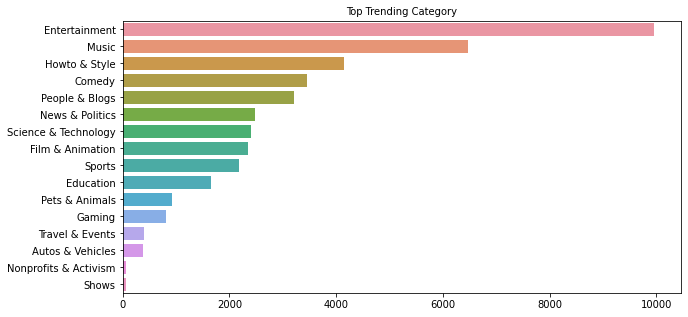

In [9]:
fig = plt.figure(figsize=(10,5))
Top_category =us_data.groupby(['category_name']).size().sort_values(ascending=False)
sns.barplot(Top_category.values, Top_category.index.values)
plt.title('Top Trending Category',fontsize=10)

Text(0.5, 1.0, 'Most views video in YouTube')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_

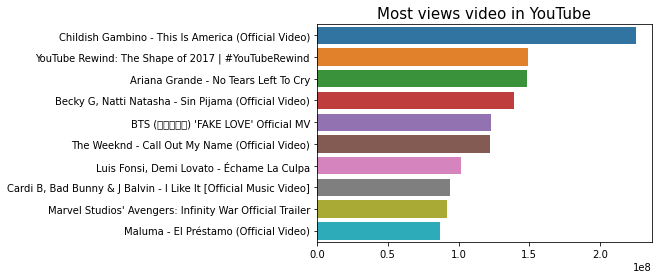

In [10]:
top_10_view_name =us_data.sort_values(by='views',ascending=False)['title'].unique().tolist()[:10]
top_10_view=[]
for i in range(len(top_10_view_name)):
    top_10_view.append(us_data[us_data['title']==top_10_view_name[i]]['views'].sort_values(ascending=False)[:1].values[0])
sns.barplot(x=top_10_view, y=top_10_view_name)
plt.title('Most views video in YouTube',fontsize=15)

Text(0.5, 1.0, 'Top 10 Most Liked video in YouTube')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 36681 missing from current font.
  font.set_

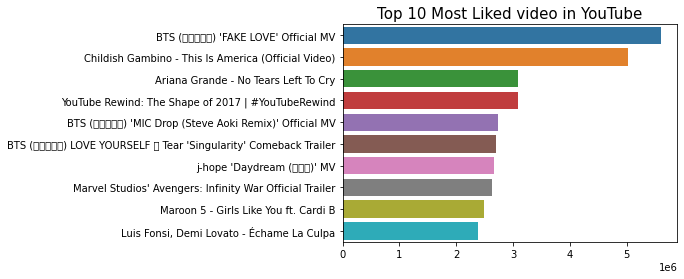

In [11]:
top_10_liked_name =us_data.sort_values(by='likes',ascending=False)['title'].unique().tolist()[:10]
top_10_liked=[]
for i in range(len(top_10_liked_name)):
    top_10_liked.append(us_data[us_data['title']==top_10_liked_name[i]]['likes'].sort_values(ascending=False)[:1].values[0])
sns.barplot(x=top_10_liked, y=top_10_liked_name)
plt.title('Top 10 Most Liked video in YouTube',fontsize=15)

Text(0.5, 1.0, 'Top 10 Most Comment video in YouTube')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48177 missing from current font.
  font.set_

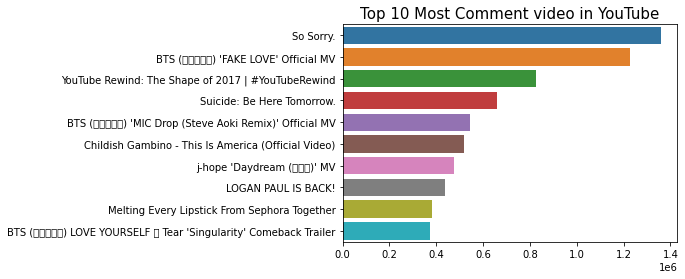

In [12]:
top_10_comment_name =us_data.sort_values(by='comment_count',ascending=False)['title'].unique().tolist()[:10]
top_10_comment=[]
for i in range(len(top_10_comment_name)):
    top_10_comment.append(us_data[us_data['title']==top_10_comment_name[i]]['comment_count'].sort_values(ascending=False)[:1].values[0])
sns.barplot(x=top_10_comment, y=top_10_comment_name)
plt.title('Top 10 Most Comment video in YouTube',fontsize=15)

In [13]:
likes_rate=[]
for i in range(len(us_data['likes'])):
    likes_rate.append(us_data['likes'][i]/us_data['dislikes'][i])
us_data['likes_rate']=likes_rate

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in long_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
us_data['likes_rate'].isnull().sum()

170

In [15]:
us_data['likes_rate'].fillna(0)

0         19.395482
1         15.812724
2         27.352126
3         15.273273
4         66.483157
            ...    
40944     27.552347
40945    157.089005
40946     46.577519
40947     67.799368
40948      1.676616
Name: likes_rate, Length: 40949, dtype: float64

In [16]:
us_data['likes_rate'].replace(float("inf"),0 ,inplace=True)

In [17]:
us_data.sort_values(by='likes_rate',ascending=False)['title'].unique().tolist()[:10]

['Jonghyun Lonely (Feat. 태연) - Piano Cover',
 'THINGS THAT ARE LOWER',
 'JUST GO SHOOT. A PHOTOGRAPHY VLOG 137',
 'GOALS GOALS GOALS',
 'Interview with Clarice Lispector - São Paulo, 1977 (English subtitles)',
 'Free Fall Ride In Denmark',
 'BOYFRIEND DOES MY MAKEUP | Madelaine Petsch',
 'CHRISTMAS PANIC! - Topi the Corgi',
 "[STATION] SMTOWN 'Dear My Family (Live Concert Ver.)' MV",
 'This Man Has Comforted Over 1,200 Newborns']

Text(0.5, 1.0, 'Top 10 Most likes_rate video in YouTube')

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 53468 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0, flags=flags)


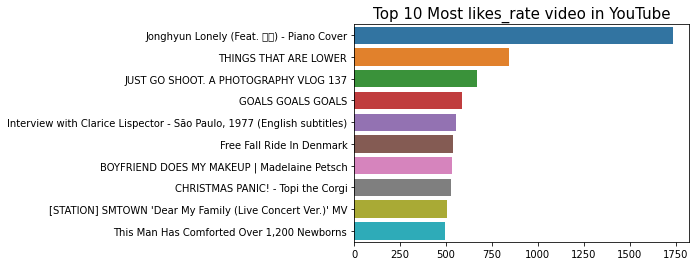

In [18]:
top_10_likes_rate_name =us_data.sort_values(by='likes_rate',ascending=False)['title'].unique().tolist()[:10]
top_10_likes_rate=[]
for i in range(len(top_10_likes_rate_name)):
    top_10_likes_rate.append(us_data[us_data['title']==top_10_likes_rate_name[i]]['likes_rate'].sort_values(ascending=False)[:1].values[0])
sns.barplot(x=top_10_likes_rate, y=top_10_likes_rate_name)
plt.title('Top 10 Most likes_rate video in YouTube',fontsize=15)

In [19]:
channel_view=[]
for i in range(len(us_data['channel_title'].unique().tolist())):
    channel_view.append(us_data[us_data['channel_title']==us_data['channel_title'].unique().tolist()[i]]['views'].sum())
channel_data={'Title':us_data['channel_title'].unique().tolist(),
             'Max View':channel_view}
channel_dataset = pd.DataFrame(channel_data)
channel_dataset 

,Title,Max View
0,CaseyNeistat,232745266
1,LastWeekTonight,97556377
2,Rudy Mancuso,240999117
3,Good Mythical Morning,142231380
4,nigahiga,590616191
...,...,...
2202,HALO,6849514
2203,Ben Kronengold,8216537
2204,All Def Digital,1807153
2205,How It Should Have Ended,16880390


In [20]:
Top_10_most_viewed_channel=channel_dataset.sort_values(by='Max View', ascending=False)[:10]
Top_10_most_viewed_channel

,Title,Max View
2128,ChildishGambinoVEVO,3758488765
292,ibighit,2235906679
699,Dude Perfect,1870085178
520,Marvel Entertainment,1808998971
2076,ArianaGrandeVevo,1576959172
1956,MalumaVEVO,1551515831
704,jypentertainment,1486972132
588,Sony Pictures Entertainment,1432374398
2092,FoxStarHindi,1238609854
2075,BeckyGVEVO,1182971286


Text(0.5, 1.0, 'Top 10 most viewed Channel')

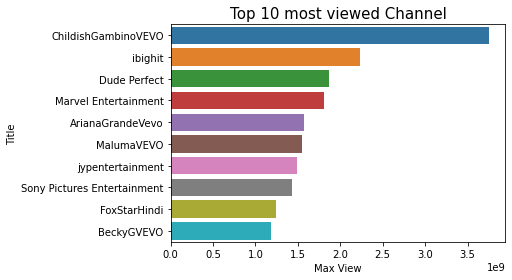

In [21]:
sns.barplot(x="Max View", y="Title", data=Top_10_most_viewed_channel)
plt.title('Top 10 most viewed Channel',fontsize=15)

In [22]:
us_data['category_name']

0          People & Blogs
1           Entertainment
2                  Comedy
3           Entertainment
4           Entertainment
               ...       
40944      Pets & Animals
40945      People & Blogs
40946       Entertainment
40947    Film & Animation
40948              Gaming
Name: category_name, Length: 40949, dtype: object

In [23]:
category_view=[]
for i in range(len(us_data['category_name'].unique().tolist())):
    category_view.append(us_data[us_data['category_name']==us_data['category_name'].unique().tolist()[i]]['views'].sum())
category_data={'Title':us_data['category_name'].unique().tolist(),
              'Max View':category_view}
category_dataset = pd.DataFrame(category_data)

In [24]:
most_viewed_category =category_dataset.sort_values(by='Max View', ascending=False)

Text(0.5, 1.0, 'Top 10 most viewed Category')

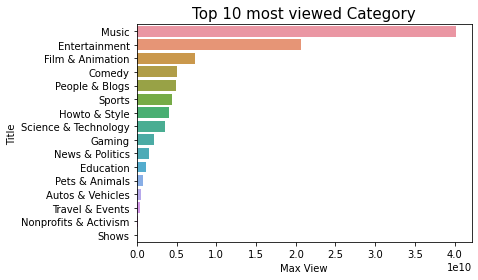

In [25]:
sns.barplot(x="Max View", y="Title", data=most_viewed_category)
plt.title('Top 10 most viewed Category',fontsize=15)

In [26]:
category_like=[]
for i in range(len(us_data['category_name'].unique().tolist())):
    category_like.append(us_data[us_data['category_name']==us_data['category_name'].unique().tolist()[i]]['likes'].sum())
category_like_data={'Title':us_data['category_name'].unique().tolist(),
              'Max likes':category_like}
category_like_dataset = pd.DataFrame(category_like_data)
most_Liked_category =category_like_dataset.sort_values(by='Max likes', ascending=False)

Text(0.5, 1.0, 'Top 10 most Liked Category')

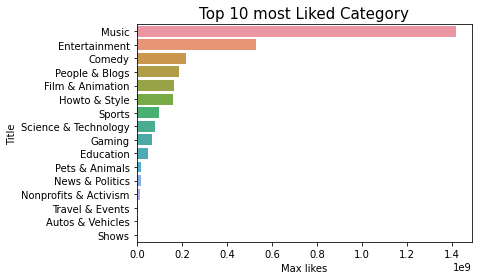

In [27]:
sns.barplot(x="Max likes", y="Title", data=most_Liked_category)
plt.title('Top 10 most Liked Category',fontsize=15)

Text(0.5, 1.0, 'Likes vs. Views')

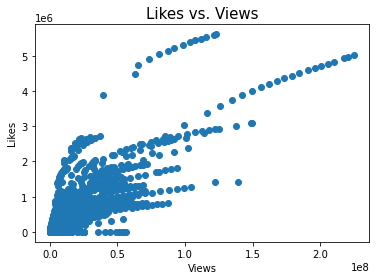

In [28]:
fig, ax = plt.subplots()
plt.scatter(x=us_data['views'], y=us_data['likes'])
ax.set(xlabel="Views", ylabel="Likes")
plt.title("Likes vs. Views",fontsize=15)

Text(0.5, 1.0, 'Comment vs. Views')

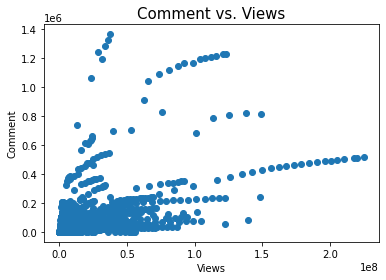

In [29]:
fig, ax = plt.subplots()
plt.scatter(x=us_data['views'], y=us_data['comment_count'])
ax.set(xlabel="Views", ylabel="Comment")
plt.title("Comment vs. Views",fontsize=15)

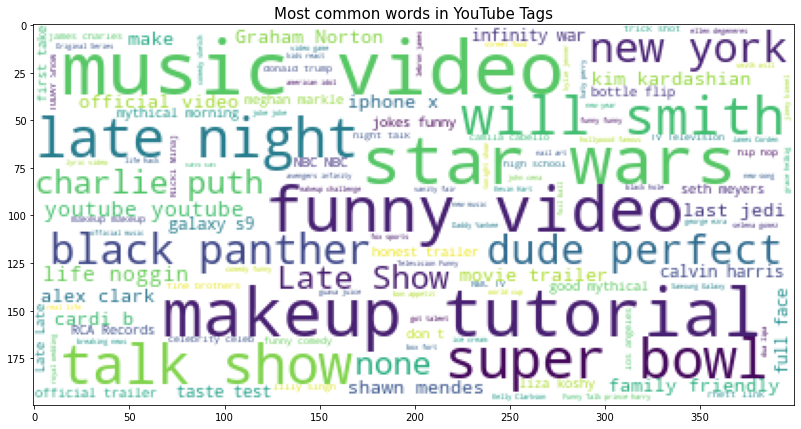

In [30]:
tag_review = WordCloud(    background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list(us_data['tags'])))
fig, axs = plt.subplots(figsize = (14,7))
axs.set_title("Most common words in YouTube Tags",fontsize=15)
axs.imshow(tag_review)

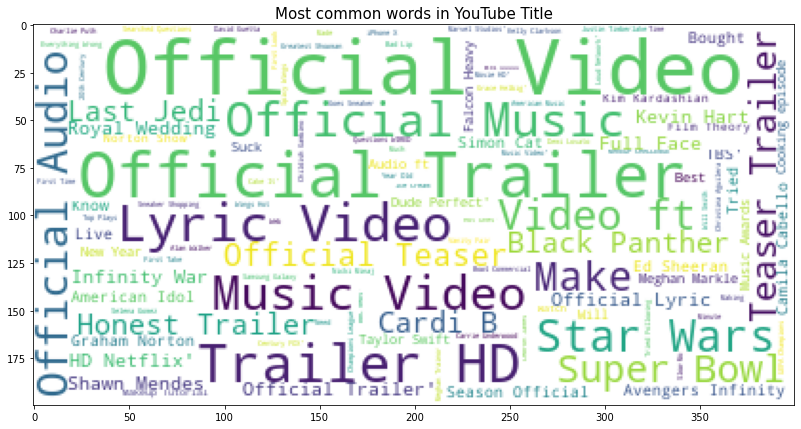

In [31]:
title_review = WordCloud(    background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list(us_data['title'])))
fig, axs = plt.subplots(figsize = (14,7))
axs.set_title("Most common words in YouTube Title",fontsize=15)
axs.imshow(title_review)

In [32]:
us_data['description'].isnull().sum()

570

In [33]:
us_data =us_data.dropna()

In [34]:
us_data.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
category_name             0
likes_rate                0
dtype: int64

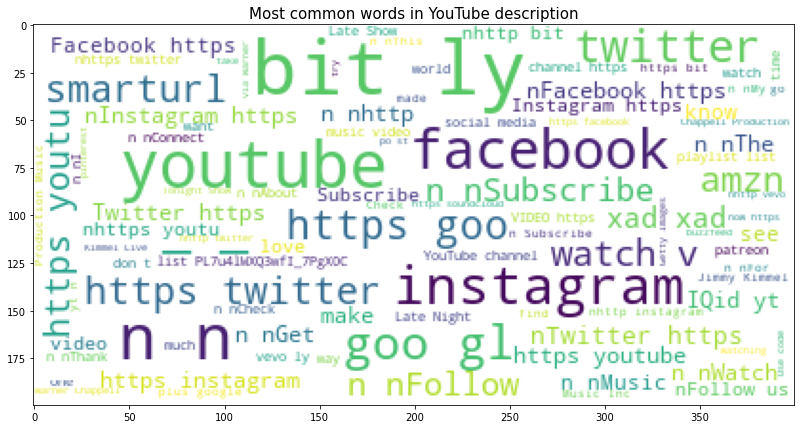

In [35]:
description_review = WordCloud(    background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(list(us_data['description'])))
fig, axs = plt.subplots(figsize = (14,7))
axs.set_title("Most common words in YouTube description",fontsize=15)
axs.imshow(description_review)

In [36]:
us_data["video_error_or_removed"].value_counts()

False    40188
True        21
Name: video_error_or_removed, dtype: int64

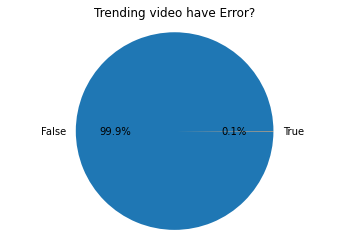

In [37]:
Not_removed_video = len(us_data[us_data['video_error_or_removed']==False])
Removed_video = len(us_data[us_data['video_error_or_removed']==True])
Error_video = [Not_removed_video,Removed_video]
labels = 'False','True'
plt.pie(Error_video,labels=labels,autopct='%1.1f%%')
plt.title('Trending video have Error?')
plt.axis('equal')
plt.show()

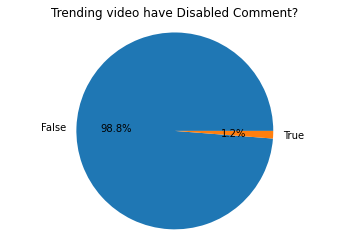

In [38]:
comment_video = len(us_data[us_data['comments_disabled']==False])
comment_disabled_video = len(us_data[us_data['comments_disabled']==True])
comment_video = [comment_video,comment_disabled_video]
labels = 'False','True'
plt.pie(comment_video,labels=labels,autopct='%1.1f%%')
plt.title('Trending video have Disabled Comment?')
plt.axis('equal')
plt.show()

In [39]:
X=us_data[['category_id','views','dislikes','comment_count','likes_rate']]
y=us_data['likes']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

In [43]:
lin_reg.intercept_

14007.232832221343

In [44]:
coeff_df = pd.DataFrame(lin_reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
category_id,-1043.008258
views,0.017272
dislikes,-1.535601
comment_count,3.868951
likes_rate,325.959132


In [45]:
lin_score =lin_reg.score(X_train,y_train)
lin_pred_score =round(lin_score*100,2)
lin_pred_score

89.87

[331194.47121551  -4140.53244951  15981.59501727 ...  26639.96154027
 135885.95825618  27909.66150159]


Text(0, 0.5, 'Predictions')

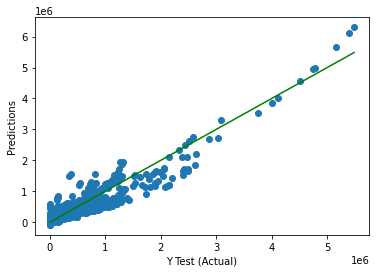

In [46]:
pred_lin = lin_reg.predict(X_test)
print(pred_lin)
plt.scatter(y_test, pred_lin)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'g')
plt.xlabel('Y Test (Actual)')
plt.ylabel('Predictions')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='likes', ylabel='Density'>

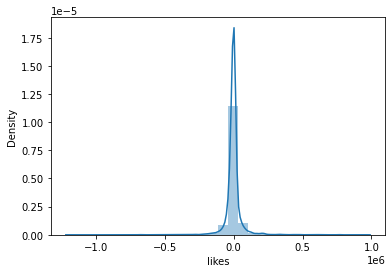

In [47]:
sns.distplot((y_test-pred_lin),bins=30)

In [48]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [49]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [50]:
print_evaluate(y_train,lin_reg.predict(X_train))

MAE: 29304.520519704754
MSE: 5430222500.014788
RMSE: 73690.043425247
R2 Square 0.8986879773204062


In [51]:
from sklearn import metrics

In [52]:
print(str(round(lin_reg.score(X_test,y_test)*100,2))+"%")

90.26%
